In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('future.no_silent_downcasting', True)

In [2]:
df = pd.read_csv("train.csv")
df = df[["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude", "Weatherconditions", "Road_traffic_density", "Type_of_vehicle", "multiple_deliveries", "Time_taken(min)"]]

In [3]:
df.shape

(45593, 9)

In [4]:
df.head(11)

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Type_of_vehicle,multiple_deliveries,Time_taken(min)
0,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,motorcycle,0,(min) 24
1,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,scooter,1,(min) 33
2,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,motorcycle,1,(min) 26
3,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,motorcycle,1,(min) 21
4,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,scooter,1,(min) 30
5,17.431668,78.408321,17.461668,78.438321,conditions Cloudy,Jam,motorcycle,1,(min) 26
6,23.369746,85.339820,23.479746,85.449820,conditions Fog,Jam,scooter,1,(min) 40
7,12.352058,76.606650,12.482058,76.736650,conditions Cloudy,Medium,motorcycle,1,(min) 32
8,17.433809,78.386744,17.563809,78.516744,conditions Stormy,Jam,motorcycle,1,(min) 34
9,30.327968,78.046106,30.397968,78.116106,conditions Fog,Jam,motorcycle,3,(min) 46


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Restaurant_latitude          45593 non-null  float64
 1   Restaurant_longitude         45593 non-null  float64
 2   Delivery_location_latitude   45593 non-null  float64
 3   Delivery_location_longitude  45593 non-null  float64
 4   Weatherconditions            45593 non-null  object 
 5   Road_traffic_density         45593 non-null  object 
 6   Type_of_vehicle              45593 non-null  object 
 7   multiple_deliveries          45593 non-null  object 
 8   Time_taken(min)              45593 non-null  object 
dtypes: float64(4), object(5)
memory usage: 3.1+ MB


In [6]:
def trim(x):
    
    i = 0
    if pd.isna(x):
        return x
    while (i < len(x) and (x[i] < '0' or x[i] > '9')):
        i += 1
    j = i
    while (j < len(x) and (x[j] >= '0' and x[j] <= '9')):
        j += 1
    x = x[i:j]
    try:
        return int(x)
    except:
        return None
df['Time_taken(min)'] = df['Time_taken(min)'].apply(trim)

Type_of_vehicle
electric_scooter     24.470110
scooter              24.480754
bicycle              26.426471
motorcycle           27.605674
Name: Time_taken(min), dtype: float64


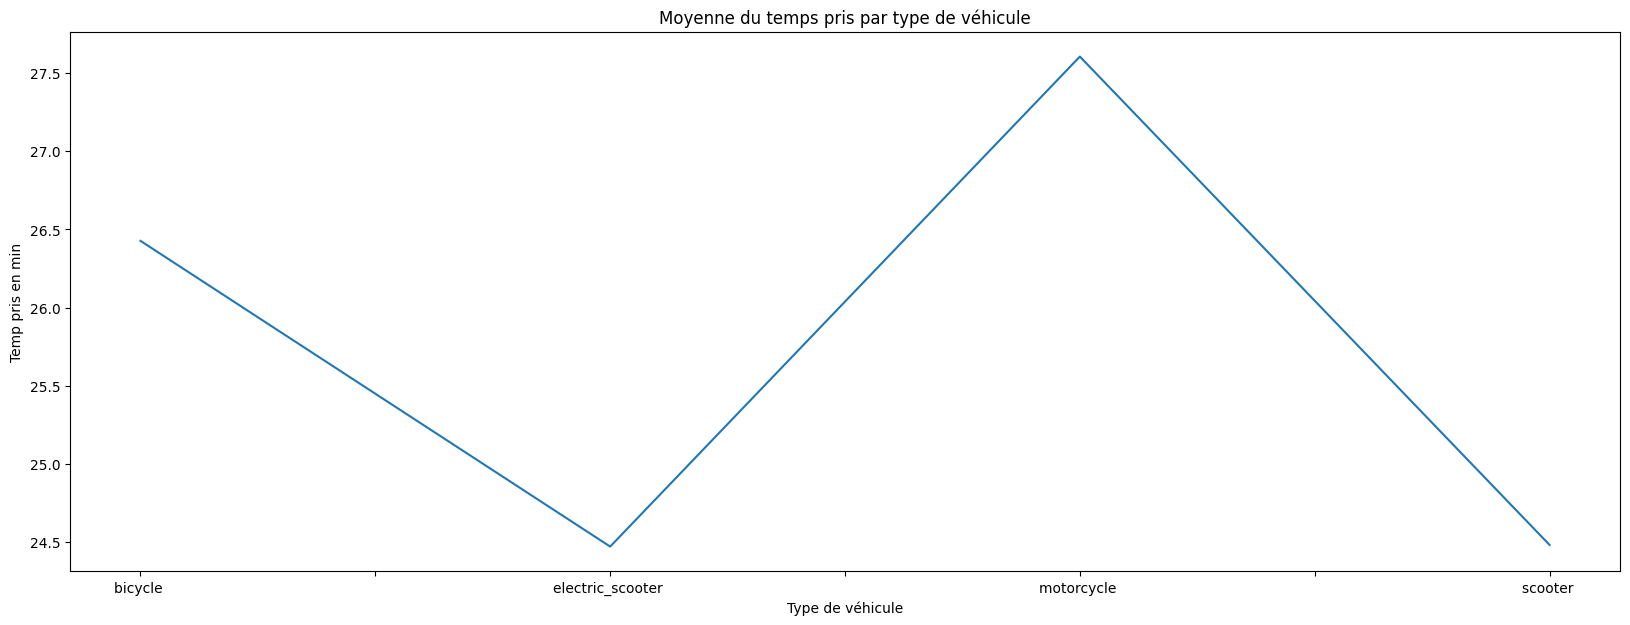

In [7]:
average_time = df.groupby("Type_of_vehicle")["Time_taken(min)"].mean()
print(average_time.sort_values())
plt.figure(figsize=(20, 7))
average_time.plot(kind='line')
plt.xlabel("Type de véhicule")
plt.ylabel("Temp pris en min")
plt.title("Moyenne du temps pris par type de véhicule")
plt.show()

Road_traffic_density
Low        21.266977
NaN        26.542429
Medium     26.699644
High       27.240000
Jam        31.176624
Name: Time_taken(min), dtype: float64


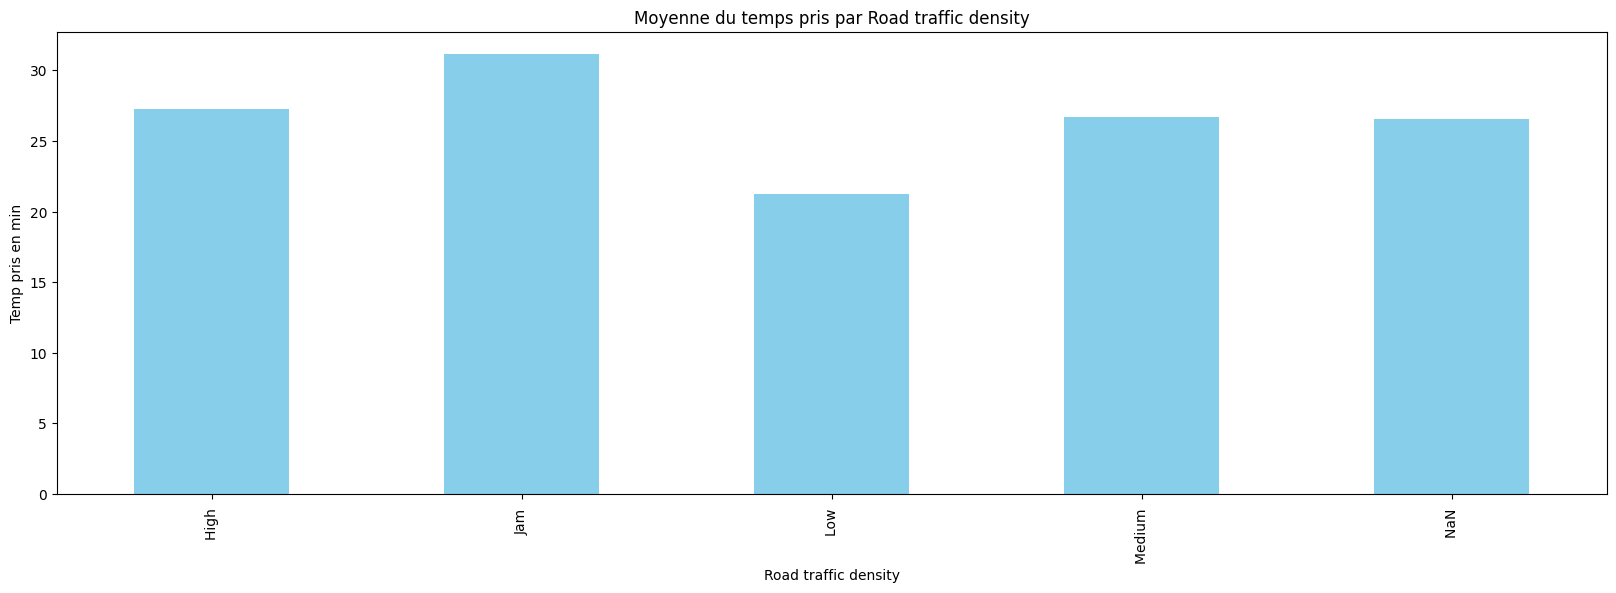

In [8]:
average_time = df.groupby("Road_traffic_density")["Time_taken(min)"].mean()
print(average_time.sort_values())
plt.figure(figsize=(20, 6))
average_time.plot(kind='bar', color='skyblue')
plt.xlabel("Road traffic density")
plt.ylabel("Temp pris en min")
plt.title("Moyenne du temps pris par Road traffic density")
plt.show()

Weatherconditions
conditions Sunny         21.856947
conditions Stormy        25.870815
conditions Sandstorms    25.875517
conditions Windy         26.118836
conditions NaN           26.545455
conditions Fog           28.916122
conditions Cloudy        28.917330
Name: Time_taken(min), dtype: float64


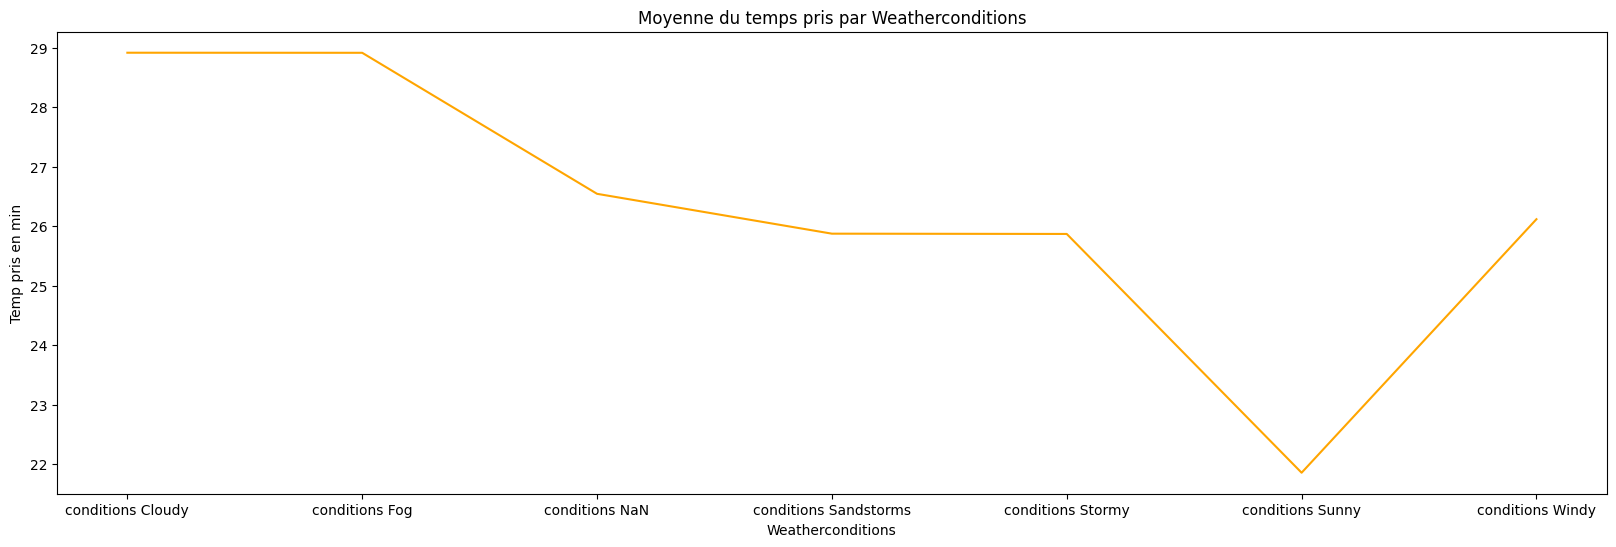

In [9]:
average_time = df.groupby("Weatherconditions")["Time_taken(min)"].mean()
print(average_time.sort_values())
plt.figure(figsize=(20, 6))
average_time.plot(kind='line', color='orange')
plt.xlabel("Weatherconditions")
plt.ylabel("Temp pris en min")
plt.title("Moyenne du temps pris par Weatherconditions")
plt.show()

In [10]:
dict_correspendance = {'conditions Sunny':1,'conditions Stormy':2, 
                       'conditions Sandstorms':3, 'conditions Fog':5,
                       'conditions Windy':4,'conditions Cloudy':6}
df['Weatherconditions']=df['Weatherconditions'].str.strip().replace(dict_correspendance)

dict_correspendance = {'High':3,'Jam':4, 
                       'Low':1, 'Medium':2}
df['Road_traffic_density']=df['Road_traffic_density'].str.strip().replace(dict_correspendance)

dict_correspendance = { 'motorcycle' : 4 ,'bicycle':3, 'scooter' : 2 , 'electric_scooter' : 1 } 
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.strip().replace(dict_correspendance)
df['multiple_deliveries'] = df['multiple_deliveries'].apply(pd.to_numeric, errors='coerce')
df['Restaurant_latitude'] = df['Restaurant_latitude'].apply(pd.to_numeric, errors='coerce')
df['Restaurant_longitude'] = df['Restaurant_longitude'].apply(pd.to_numeric, errors='coerce')
df['Delivery_location_latitude'] = df['Delivery_location_latitude'].apply(pd.to_numeric, errors='coerce')
df['Delivery_location_longitude'] = df['Delivery_location_longitude'].apply(pd.to_numeric, errors='coerce')
df['Weatherconditions'] = df['Weatherconditions'].apply(pd.to_numeric, errors='coerce')
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(pd.to_numeric, errors='coerce')
df['Road_traffic_density'] = df['Road_traffic_density'].apply(pd.to_numeric, errors='coerce')

In [11]:
columns_to_check = ["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude", "Weatherconditions", "Road_traffic_density", "Type_of_vehicle", "multiple_deliveries"]
df.dropna(subset=columns_to_check,inplace=True, axis=0)

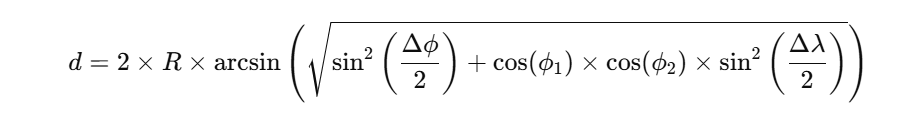


In [12]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en km
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2]) # transforme les coordonnees en radian
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    distance = R * c
    return distance # resultat en Km

In [13]:
df['Distance (Km)'] = df.apply(lambda row:haversine(row['Restaurant_latitude'],row['Restaurant_longitude'],row['Delivery_location_latitude'],row['Delivery_location_longitude']),axis=1)

df.drop(["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"], axis=1, inplace=True)
df = df[["Weatherconditions", "Road_traffic_density", "Type_of_vehicle", "multiple_deliveries","Distance (Km)","Time_taken(min)"]]


In [14]:

df.head(11)

,Weatherconditions,Road_traffic_density,Type_of_vehicle,multiple_deliveries,Distance (Km),Time_taken(min)
0,1.0,3.0,4,0.0,3.025149,24
1,2.0,4.0,2,1.0,20.183530,33
2,3.0,1.0,4,1.0,1.552758,26
3,1.0,2.0,4,1.0,7.790401,21
4,6.0,3.0,2,1.0,6.210138,30
5,6.0,4.0,4,1.0,4.610365,26
6,5.0,4.0,2,1.0,16.600361,40
7,6.0,2.0,4,1.0,20.205253,32
8,2.0,4.0,4,1.0,19.975520,34
9,5.0,4.0,4,3.0,10.280582,46


In [15]:
df[df['Distance (Km)']>70]

,Weatherconditions,Road_traffic_density,Type_of_vehicle,multiple_deliveries,Distance (Km),Time_taken(min)
92,3.0,1.0,2,0.0,6048.631240,15
283,3.0,4.0,2,1.0,6047.919478,31
289,2.0,4.0,2,0.0,16612.239055,12
583,6.0,3.0,4,0.0,2740.280655,29
1059,5.0,1.0,4,1.0,18097.339322,15
...,...,...,...,...,...,...
44640,1.0,4.0,4,1.0,2230.110757,21
44694,5.0,4.0,4,1.0,2897.986655,33
44933,5.0,1.0,4,0.0,4423.276011,15
45108,4.0,4.0,2,1.0,16560.629487,19


In [16]:
df[df['Time_taken(min)'] > 50]

,Weatherconditions,Road_traffic_density,Type_of_vehicle,multiple_deliveries,Distance (Km),Time_taken(min)
43,3.0,4.0,4,3.0,13.682516,52
188,3.0,4.0,4,1.0,13.989917,54
266,6.0,4.0,4,2.0,10.417066,53
641,1.0,4.0,4,1.0,8.790360,54
722,2.0,4.0,4,1.0,10.756273,53
...,...,...,...,...,...,...
45207,3.0,4.0,4,3.0,13.990151,51
45231,6.0,4.0,4,1.0,19.975287,51
45294,3.0,4.0,4,1.0,19.373746,53
45305,6.0,4.0,4,1.0,10.642289,51


In [17]:
df = df[df['Distance (Km)'] <= 15]

In [18]:
test_df = df.tail(2000)
df = df.head(len(df) - 2000)

In [19]:
#Clean DataFrame
df.head(11)

,Weatherconditions,Road_traffic_density,Type_of_vehicle,multiple_deliveries,Distance (Km),Time_taken(min)
0,1.0,3.0,4,0.0,3.025149,24
2,3.0,1.0,4,1.0,1.552758,26
3,1.0,2.0,4,1.0,7.790401,21
4,6.0,3.0,2,1.0,6.210138,30
5,6.0,4.0,4,1.0,4.610365,26
9,5.0,4.0,4,3.0,10.280582,46
10,2.0,3.0,4,1.0,6.242319,23
11,3.0,2.0,2,1.0,13.787860,21
12,3.0,1.0,4,0.0,2.930258,20
14,3.0,4.0,1,1.0,13.763977,20


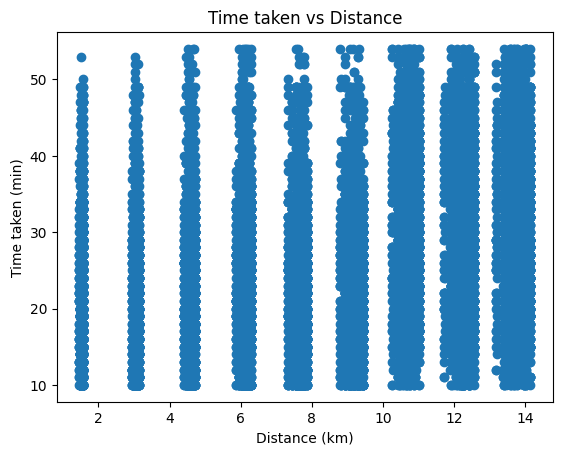

In [20]:
plt.scatter(df['Distance (Km)'], df['Time_taken(min)'])
plt.xlabel('Distance (km)')
plt.ylabel('Time taken (min)')
plt.title('Time taken vs Distance')
plt.show()

In [21]:
w = [0,1,2,3,4]
print(np.dot(w, df.iloc[0][:-1]))
print(df.iloc[0]['Time_taken(min)'])

23.100597142710015
24.0


In [22]:
# cost function
# w est une liste et non pas un scalaire

def squared_error(df, w, b):
    predictions = np.dot(df.iloc[:, :-1], w) + b
    errors = predictions - df['Time_taken(min)']
    return np.sum(errors**2) / (2 * len(df))

In [23]:
def gradient_descent(df, w, b, alpha):
    
    predictions = np.dot(df.iloc[:, :-1], w) + b
    errors = predictions - df['Time_taken(min)']
    gradient_w = np.dot(df.iloc[:, :-1].T, errors) / len(df)
    gradient_b = np.sum(errors) / len(df)
    w -= alpha * gradient_w
    b -= alpha * gradient_b
    
    return w, b

In [24]:
w = np.zeros(df.shape[1] - 1)
b = 0 

alpha = 0.01  
iterations = 4000 
cost_track = []
iteration_track = []
# Entraînement du modèle
for iteration in range(iterations):
    w, b = gradient_descent(df, w, b, alpha)
    if iteration % 100 == 0: 
        cost = squared_error(df, w, b)
        cost_track.append(cost)
        iteration_track.append(iteration)
        print(f'L\'iteration {iteration}, Coût: {cost}')

L'iteration 0, Coût: 48.77366136376433
L'iteration 100, Coût: 28.642549339001743
L'iteration 200, Coût: 27.691697489472688
L'iteration 300, Coût: 27.22928732182065
L'iteration 400, Coût: 26.958117839575856
L'iteration 500, Coût: 26.79021163907353
L'iteration 600, Coût: 26.680414565237616
L'iteration 700, Coût: 26.60406803402083
L'iteration 800, Coût: 26.547558699464396
L'iteration 900, Coût: 26.503306455340354
L'iteration 1000, Coût: 26.467037168742518
L'iteration 1100, Coût: 26.43629379814967
L'iteration 1200, Coût: 26.409622791797283
L'iteration 1300, Coût: 26.386129015814515
L'iteration 1400, Coût: 26.36523186615578
L'iteration 1500, Coût: 26.34653124990498
L'iteration 1600, Coût: 26.329733604203657
L'iteration 1700, Coût: 26.31461075524253
L'iteration 1800, Coût: 26.300976770046372
L'iteration 1900, Coût: 26.288674692998892
L'iteration 2000, Coût: 26.27756873673735
L'iteration 2100, Coût: 26.26753950425902
L'iteration 2200, Coût: 26.258480914806476
L'iteration 2300, Coût: 26.250298

Text(0, 0.5, 'Cost')

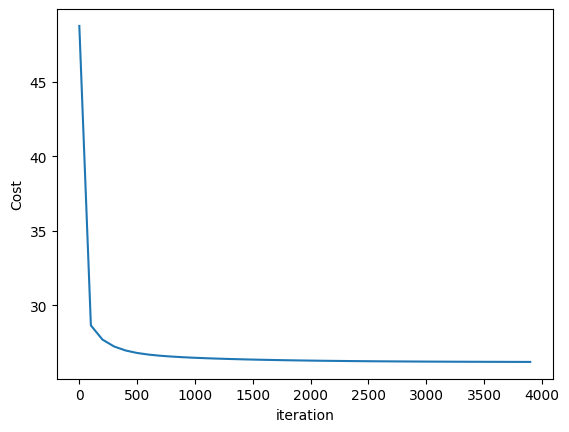

In [25]:
plt.figure()
plt.plot(iteration_track, cost_track)
plt.xlabel("iteration")
plt.ylabel("Cost")

In [26]:
print(f'Poids optimaux: {w}')
print(f'Biais optimal: {b}')

Poids optimaux: [0.89302605 2.4282605  1.2952999  4.60734361 0.49335755]
Biais optimal: 5.5763143065204


In [27]:
df['Predicted_Time_taken(min)'] = np.dot(df.iloc[:, :-1], w) + b

In [28]:
df[['Time_taken(min)', 'Predicted_Time_taken(min)']].head(20)

,Time_taken(min),Predicted_Time_taken(min)
0,24,20.427802
2,26,21.238261
3,21,24.957858
4,30,28.481014
5,26,32.710614
9,46,43.829720
10,23,27.515386
11,21,27.112202
12,20,17.310517
14,20,30.661640


In [29]:
test_df['Predicted_Time_taken(min)'] = np.dot(test_df.iloc[:, :-1], w) + b

In [30]:
test_df[['Time_taken(min)', 'Predicted_Time_taken(min)']].head(20)

,Time_taken(min),Predicted_Time_taken(min)
42983,47,36.157216
42984,20,18.295323
42985,18,20.521297
42986,10,13.000014
42987,24,25.924067
42988,22,23.447176
42991,30,30.694952
42993,28,26.636169
42994,41,35.716568
42995,38,28.370155
